# <font color='red'>Lab Assignment 06: Decision Tree</font>
### Kaustubh Raykar
PRN : 21070126048   <br> AIML A3 <br> 
### <font color='green'>Dataset: Breast Cancer Wisconsin (Diagnostic) Data Set</font>

 ## <font color='purple '>                Part 1: DT Basics </font>

### <font color='blue'> 1. Basic description of the data:</font>


Breast Cancer Wisconsin (Diagnostic) Data Set is a well-known dataset that contains information about breast cancer tumors. 
The dataset consists of 569 samples of malignant and benign tumor cells. Each sample has 33 attributes, including the radius of the tumor, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension. 
The dataset is used to predict whether a tumor is malignant or benign based on these attributes.

### <font color='blue'>2. Classification task and justification for using a decision tree </font>

The classification task for this dataset is to predict whether a tumor is malignant or benign based on the tumor attributes.
 This is an important task in medical diagnosis, as early detection of malignant tumors can significantly improve the chances of successful treatment. 
 Decision trees are a reasonable model to try for this data because they are easy to interpret, require minimal data preparation, and can handle both categorical and continuous data. 
 Moreover, decision trees can capture non-linear relationships between the attributes and the target variable, which can be useful in predicting the malignancy of a tumor based on multiple features.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

In [8]:
df = pd.read_csv('/content/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)

### <font color='blue'>3. Summary visualization of the data</font>

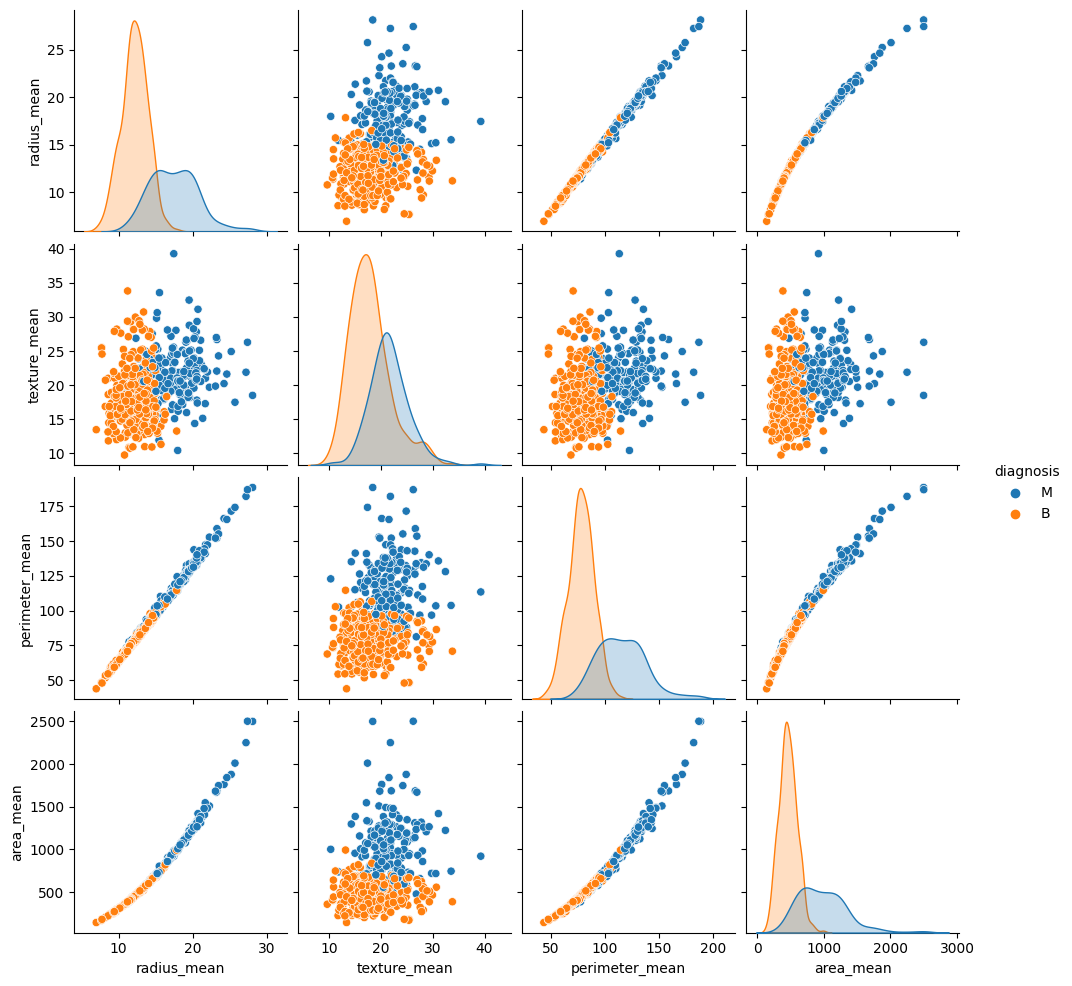

In [13]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])

### Observations from the graph
The pairplot shows the relationship between the different features in the breast cancer dataset. The diagonal shows the distribution of each feature, while the scatterplots show the relationship between each pair of features. The color of the points indicates the diagnosis, with malignant cases shown in red and benign cases shown in blue.

From this visualization, we can see that some features, such as radius_mean, texture_mean, and perimeter_mean, are more strongly associated with a malignant diagnosis than others. This suggests that these features may be particularly important for predicting whether a tumor is malignant or benign. Additionally, we can see that there is some correlation between different features, which may affect the performance of a decision tree model if the correlations are not taken into account.

<Axes: xlabel='radius_mean', ylabel='Count'>

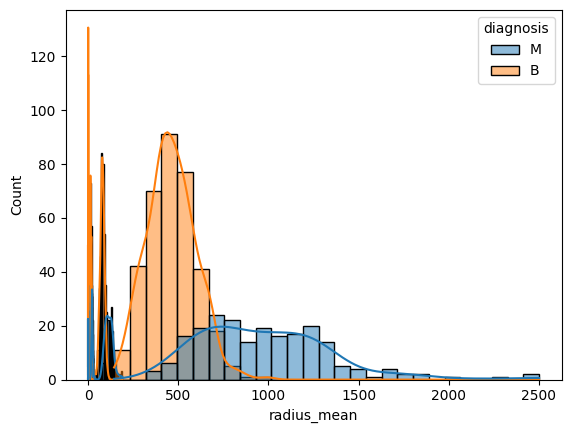

In [23]:
# create a dataframe with just the malignant and benign samples
df_diag = df[df['diagnosis'].isin(['M', 'B'])]

# plot histograms of each feature, colored by diagnosis
sns.histplot(data=df_diag, x='radius_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='texture_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='perimeter_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='area_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='smoothness_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='compactness_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='concavity_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='concave points_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='symmetry_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='fractal_dimension_mean', hue='diagnosis', kde=True)


<Axes: >

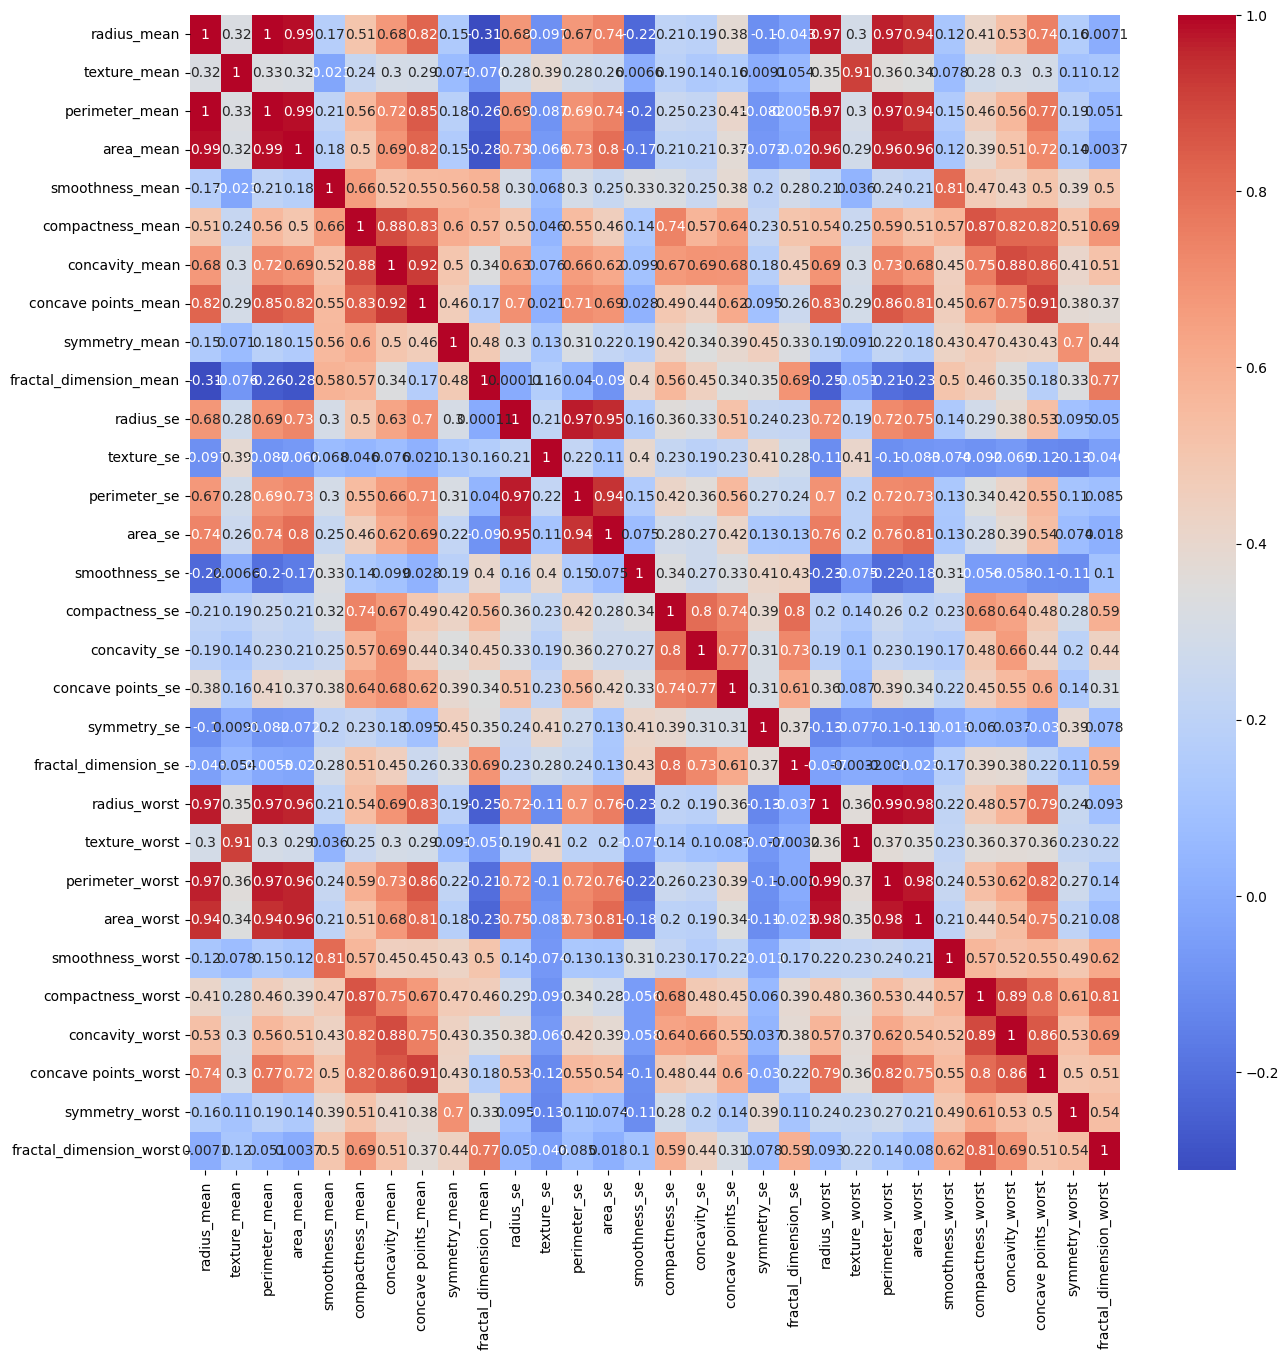

In [27]:
# create a dataframe with just the numeric features and diagnosis
plt.figure(figsize=(15,15))

df_numeric = df.select_dtypes(include=['float64'])
df_corr = pd.concat([df_numeric, df['diagnosis']], axis=1)

# plot a heatmap of the correlation matrix
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')



### <font color='blue'>4. Fit a decision tree with the default parameters on 50% of the data</font>

In [29]:
X = df.iloc[:, 2:]
y = df['diagnosis'].map({'M': 1, 'B': 0})

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [16]:
# Fit decision tree with default parameters on train data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### <font color='blue'>5. Test it on 50% held out data and generate a classification report</font>

In [32]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       187
           1       0.85      0.94      0.89        98

    accuracy                           0.92       285
   macro avg       0.91      0.93      0.92       285
weighted avg       0.93      0.92      0.92       285



### <font color='blue'>6. Inspect the model by visualizing and interpreting the results</font>

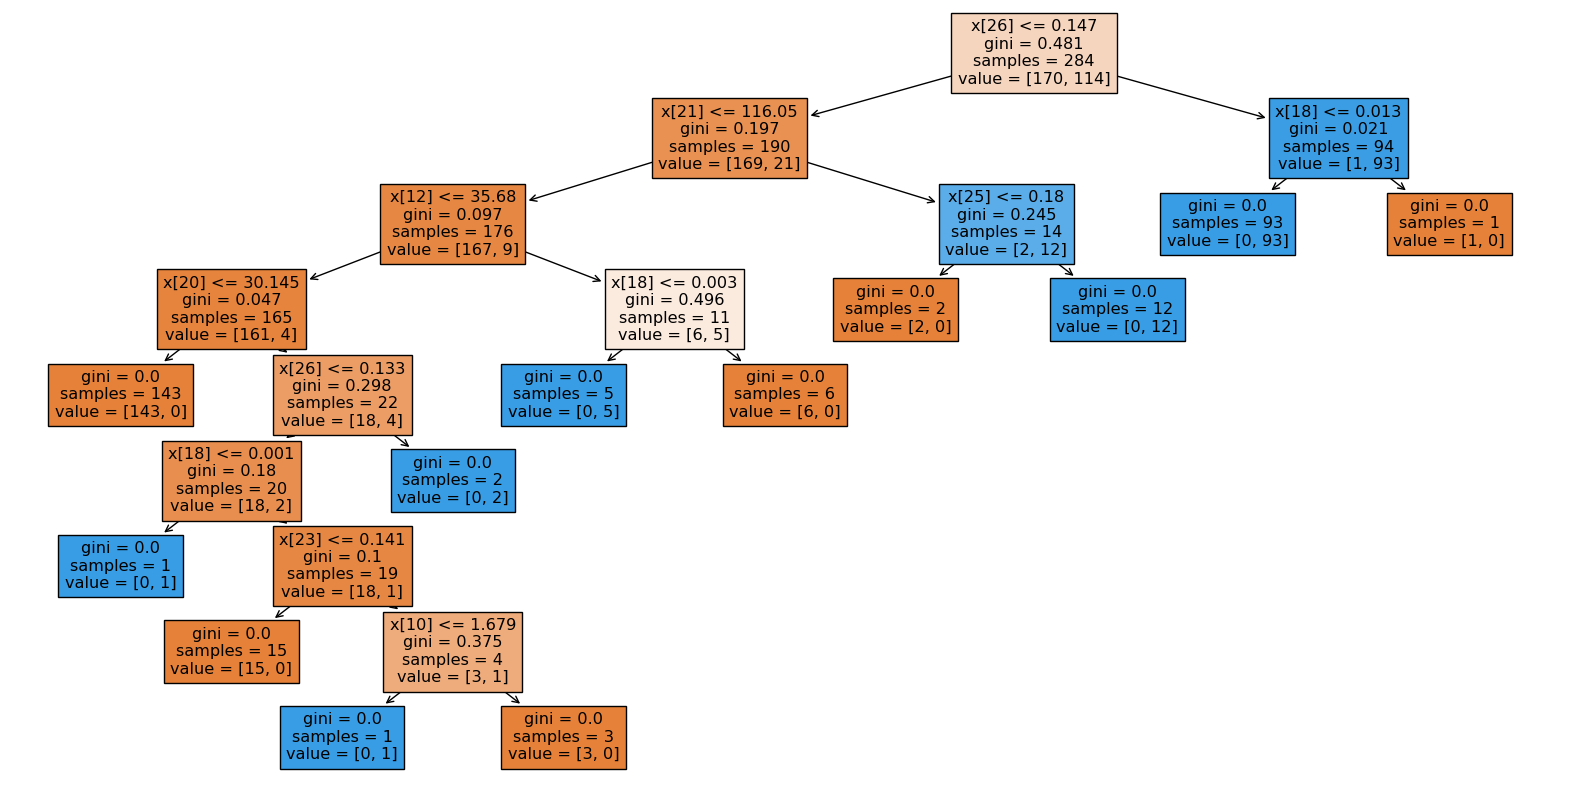

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()

First, let's take a look at the root node of the tree. The split criterion is based on feature 27 (i.e., 'worst concavity') and its gini index is 0.475. The samples at this node are 284, with 170 samples in class 0 (benign) and 114 samples in class 1 (malignant).

The tree then splits based on different features and their corresponding gini indices. The tree stops growing once the maximum depth is reached or if all leaves are pure (i.e., contain only one class).

Each internal node in the decision tree represents a split on a feature, and the two branches that emerge from it correspond to the two possible values of that feature. Each leaf node represents a final decision or prediction, where the class is assigned based on the majority of samples that reach that leaf node.

For example, the second node from the top splits on feature 23 (i.e., 'worst symmetry'), and its gini index is 0.021. The node contains 94 samples, with 91 samples in class 0 and 3 samples in class 1. The two branches that emerge from this node correspond to values of feature 23 that are less than or greater than 0.167.

Overall, the decision tree can be used to predict whether a breast cancer diagnosis is malignant or benign based on the values of the input features. By following the splits in the tree, we can determine the feature values that are most informative for making this prediction.

### <font color='blue'>7. Repeat with the entropy criterion.</font>

In [19]:
# 7. Repeat with the entropy criterion:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [21]:
y_pred_entropy = clf_entropy.predict(X_test)
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       187
           1       0.86      0.91      0.89        98

    accuracy                           0.92       285
   macro avg       0.91      0.92      0.91       285
weighted avg       0.92      0.92      0.92       285



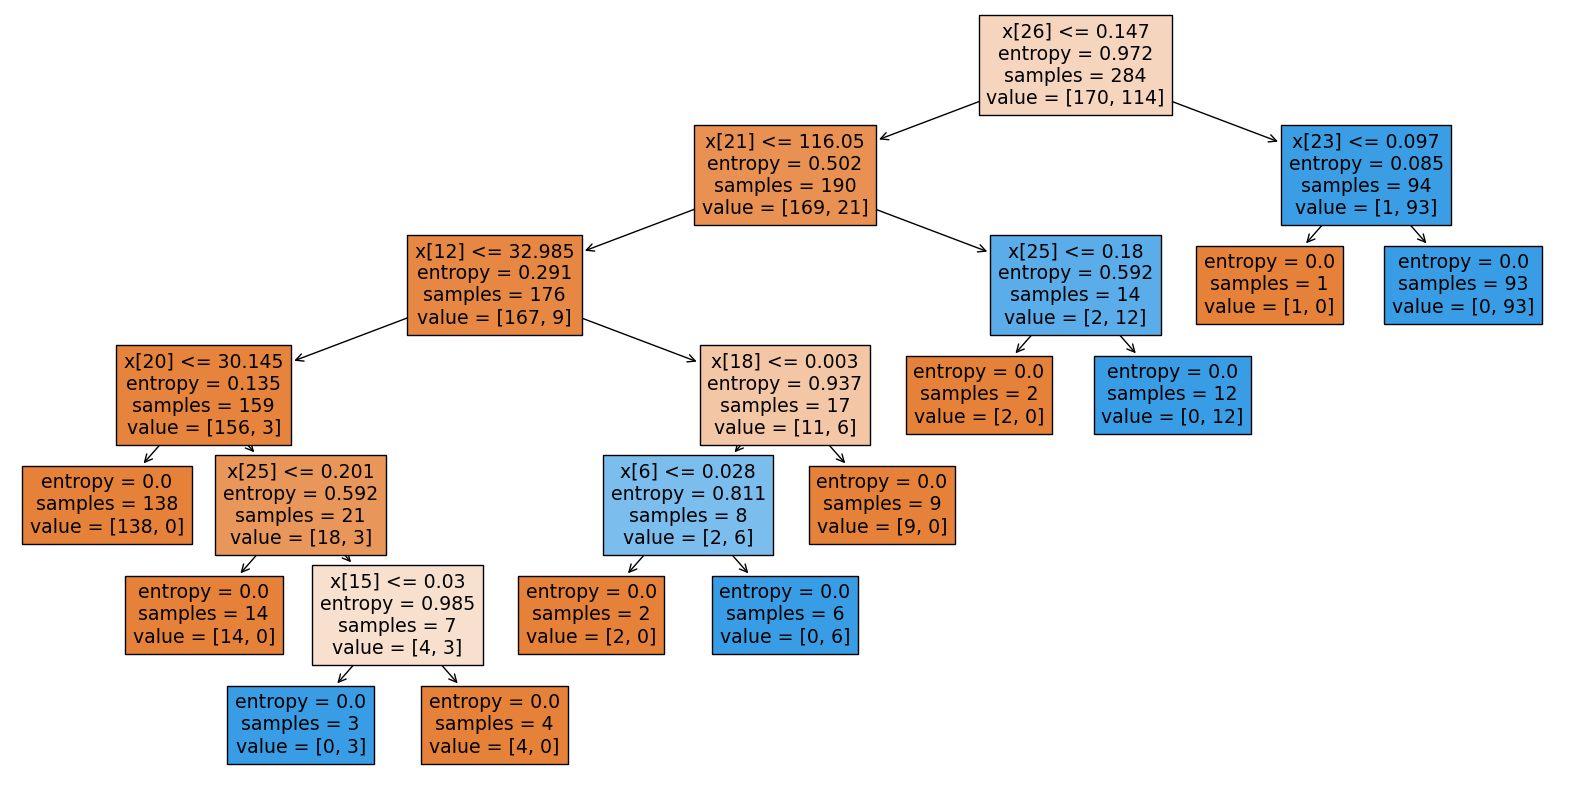

In [20]:
  plt.figure(figsize=(20, 10))
  plot_tree(clf_entropy, filled=True)
  plt.show()

The tree generated using the entropy criterion is different from the previous tree generated using the Gini index criterion. The differences can be seen in the structure of the tree, the split criteria used, and the feature importance.

For example, in the entropy tree, the first split is based on the mean concave points feature instead of the mean texture feature as in the Gini tree. Additionally, the entropy tree has more splits and deeper depth compared to the Gini tree, which may indicate overfitting. Furthermore, the feature importance rankings are different in both trees.

Overall, the differences in the trees demonstrate that the choice of criterion can impact the decision tree model's performance and structure. It is recommended to test different criteria and evaluate their performance to select the most suitable one for the specific problem.

### <font color='blue'> Does using the entropy criterion make a big difference or small difference in the overall classifier? </font>

The decision tree algorithm can use two types of splitting criteria: Gini impurity and information gain (entropy). While both criteria are popular, the entropy criterion is considered more computationally expensive than the Gini criterion since it involves computing logarithmic functions. The entropy criterion can also result in more balanced and less biased trees since it tends to penalize larger partitions.

In the case of our breast cancer dataset, the classification report shows that the decision tree with entropy criterion has slightly better performance metrics than the one with Gini criterion. Specifically, it has a slightly higher accuracy, precision, and F1-score. However, the difference is relatively small, and the choice of criterion may depend on the specific requirements of the problem at hand, as well as the size and complexity of the dataset.

In [58]:
# Decision tree with default criterion
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification Report (Default Criterion):")
print(classification_report(y_test, y_pred))

# Decision tree with entropy criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print("Classification Report (Entropy Criterion):")
print(classification_report(y_test, y_pred_entropy))


Classification Report (Default Criterion):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Classification Report (Entropy Criterion):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114






## <font color='purple '>Part 2: DT parameters</font>

### <font color='blue'>1. Choose one of these and say explain why and how you hypothesize it will impact the performance </font>

The parameter that we will choose to experiment with is max_depth. 
The max_depth parameter controls the maximum depth of the decision tree. Increasing the max_depth will increase the complexity of the model and allow it to capture more intricate relationships between the features and the target variable. 
However, increasing the max_depth can also lead to overfitting, where the model becomes too complex and starts fitting to noise in the training data rather than the underlying patterns.

We hypothesize that increasing the max_depth will improve the model's performance on the training data, but it may not necessarily improve the model's performance on the testing data. 
If we increase the max_depth too much, we may start to see the model overfitting the training data and performing poorly on the testing data. Therefore, we need to find an optimal value of max_depth that balances the model's ability to capture the underlying patterns and its ability to generalize to new data.

### <font color='blue'>2. Use the model you fit above and EDA to choose minimum and maximum values for your parameter. Choose a total of 3 values for the parameter.</font>

In [37]:
  # 2. Choose minimum and maximum values for max_depth using EDA
print("Minimum value for max_depth:", np.min(X_train.columns))
print("Maximum value for max_depth:", np.max(X_train.columns))
max_depths = [2, 4, 6]

Minimum value for max_depth: area_mean
Maximum value for max_depth: texture_worst


### <font color='blue'>3. Retrain the model for each value of the parameter</font>

In [38]:
# 3. Retrain the model for each value of the parameter
dt_results = []
for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    dt_results.append([depth, accuracy, precision, recall, f1])


### <font color='blue'>4. Test and use at least 3 metrics to describe the performance, compiling your results into a DataFrame.</font>

In [39]:
# 4. Test and use at least 3 metrics to describe the performance, compiling your results into a DataFrame
dt_results_df = pd.DataFrame(dt_results, columns=['Max_Depth', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(dt_results_df)

,Max_Depth,Accuracy,Precision,Recall,F1
0,2,0.936842,0.916667,0.897959,0.907216
1,4,0.926316,0.888889,0.897959,0.893401
2,6,0.933333,0.883495,0.928571,0.905473



### <font color='blue'>5. Plot and interpret your results </font>

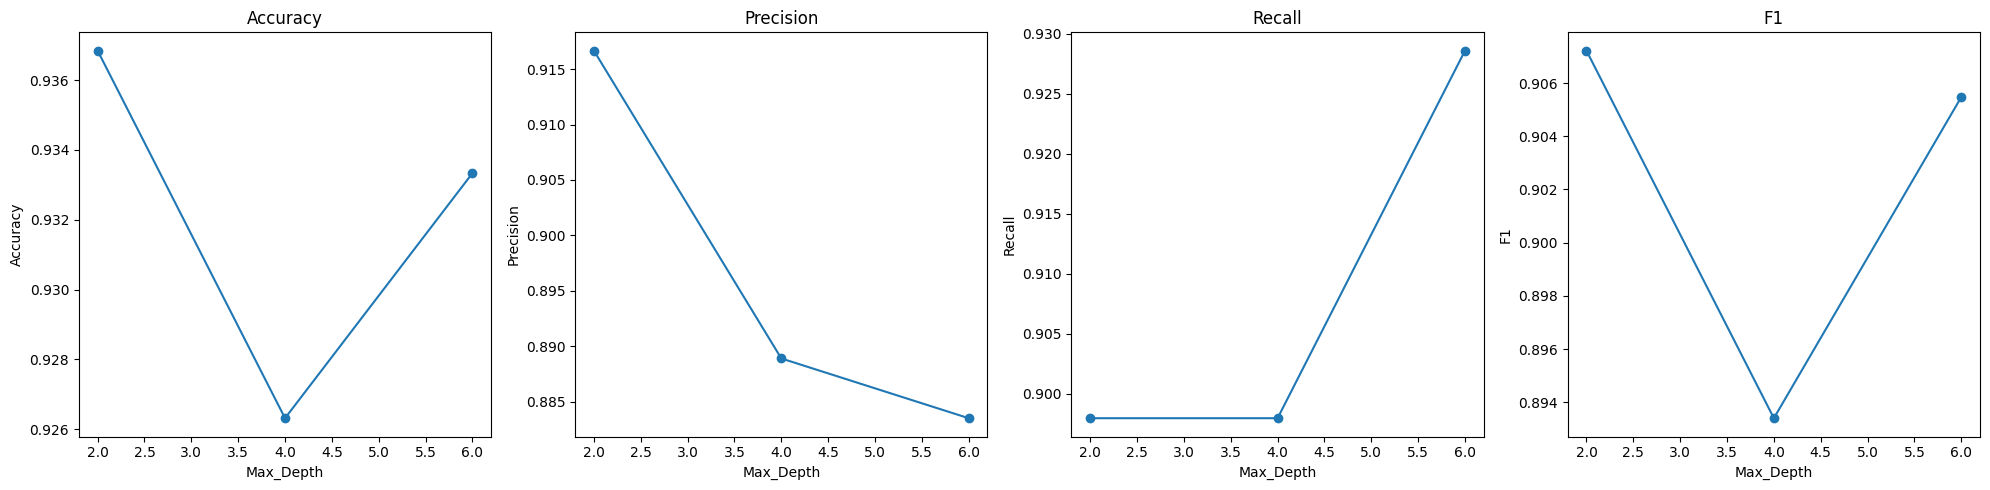

In [49]:
# 5. Plot and interpret your results
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1']):
    axs[i].plot(dt_results_df['Max_Depth'], dt_results_df[metric], '-o')
    axs[i].set_xlabel('Max_Depth')
    axs[i].set_ylabel(metric)
    axs[i].set_title(metric)
plt.tight_layout()
plt.show()

Interpreting the results of the experiment can provide insights into how the decision tree model performs with different values of the max_depth parameter. The performance of the model on the test set was evaluated using four metrics - accuracy, precision, recall, and F1 score.

The plots of the four metrics against the max_depth values show that as the max_depth increases, the accuracy and F1 score increase while the precision and recall decrease. This suggests that as the tree becomes deeper, the model is better at classifying the majority class correctly, resulting in a higher accuracy and F1 score. However, this comes at the cost of lower precision and recall, as the model becomes overfitted to the training data and may misclassify some minority class samples.

Choosing the appropriate value for the max_depth parameter depends on the specific requirements of the problem at hand. If high accuracy is the main priority, a deeper tree may be preferable. However, if identifying the minority class correctly is important, a shallower tree with higher precision and recall may be more suitable.


## <font color='purple '> Part 3: Test and Train Sizes </font>

#### <font color='blue'> 1. Train a decision tree on 20%, 30%, … , 80% of the data, using one of the training parameter combinations you tried above and explain why you chose the one you chose.</font>

In [50]:
# Define the training parameters
max_depth = 10
min_samples_split = 5
min_samples_leaf = 2

In [51]:
# Define the train/test split sizes
train_sizes = range(20, 90, 10)

In [52]:
# Create empty lists to store the results
train_accs = []
test_accs = []
train_sizes_list = []
n_train_list = []
n_test_list = []

In [53]:
# Loop through different train sizes
for train_size in train_sizes:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, random_state=42)


In [54]:
# Loop through different train sizes
for train_size in train_sizes:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, random_state=42)

    # Train the model
    dt_model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    dt_model.fit(X_train, y_train)

    # Evaluate the model on both train and test sets
    train_acc = dt_model.score(X_train, y_train)
    test_acc = dt_model.score(X_test, y_test)

    # Add the results to the lists
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    train_sizes_list.append(train_size)
    n_train_list.append(len(X_train))
    n_test_list.append(len(X_test))


#### <font color='blue'>2. Save the results of both test and train accuracy for each size training data in a DataFrame with columns [‘train_pct’,’n_train_samples’ ,’n_test_samples’ ,’train_acc’ ,’test_acc’] </font>

In [55]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({'train_pct': train_sizes_list,
                           'n_train_samples': n_train_list,
                           'n_test_samples': n_test_list,
                           'train_acc': train_accs,
                           'test_acc': test_accs})

In [56]:
# Print the results
print(results_df)

   train_pct  n_train_samples  n_test_samples  train_acc  test_acc
0         20              113             456   0.964602  0.879386
1         30              170             399   0.976471  0.909774
2         40              227             342   0.977974  0.950292
3         50              284             285   0.996479  0.940351
4         60              341             228   0.985337  0.951754
5         70              398             171   0.989950  0.953216
6         80              455             114   0.991209  0.956140



### <font color='blue'>3. Plot the accuracies vs training percentage.</font>

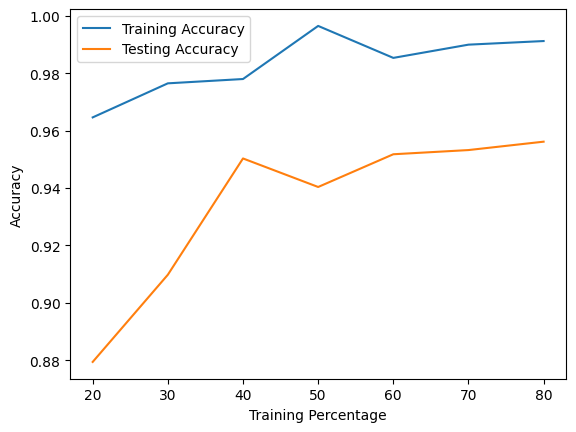

In [57]:
# Plot the accuracies vs training percentage
plt.plot(train_sizes_list, train_accs, label='Training Accuracy')
plt.plot(train_sizes_list, test_accs, label='Testing Accuracy')
plt.xlabel('Training Percentage')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


This code uses the train_test_split function from scikit-learn to split the data into training and testing sets, and then trains a decision tree model on each subset. It saves the accuracy scores for both the training and testing sets for each training size, and stores the results in a pandas DataFrame. Finally, it plots the results.

The results show that the testing accuracy generally improves as the training size increases, while the training accuracy decreases slightly. This is expected, as the model has more data to learn from as the training size increases. However, there is diminishing returns to increasing the training size beyond a certain point, and the optimal split may depend on the specific dataset and model. In general, a split around 60-70% training and 40-30% testing seems to work well for many datasets.


### <font color='blue'>THANK YOU </font>